In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from matplotlib import font_manager as fm
class FontManager:
    """Utility to load fun fonts from https://fonts.google.com/ for matplotlib.

    Find a nice font at https://fonts.google.com/, and then get its corresponding URL
    from https://github.com/google/fonts/

    Use like:

    fm = FontManager()
    fig, ax = plt.subplots()

    ax.text("Good content.", fontproperties=fm.prop, size=60)
    """

    def __init__(self, github_url):
        """
        Lazily download a font.

        Parameters
        ----------
        github_url : str
            Can really be any .ttf file, but probably looks like
            "https://github.com/google/fonts/blob/master/ofl/cinzel/Cinzel-Regular.ttf?raw=True"
        """
        self.github_url = github_url
        self._prop = None

    @property
    def prop(self):
        """Get matplotlib.font_manager.FontProperties object that sets the custom font."""
        if self._prop is None:
            with NamedTemporaryFile(delete=False, suffix=".ttf") as temp_file:
                temp_file.write(urlopen(self.github_url).read())
                self._prop = fm.FontProperties(fname=temp_file.name)
        return self._prop
font = FontManager("https://github.com/google/fonts/blob/master/ofl/imfellgreatprimersc/IMFeGPsc28P.ttf?raw=True")
font.prop.set_size(32)

cursive = FontManager("https://github.com/google/fonts/blob/master/ofl/italianno/Italianno-Regular.ttf?raw=True")
cursive.prop.set_size(42)

In [3]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: top fitness (best fitness ever)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
"""
neat_no_center = [np.loadtxt(f'neat_nocenter{i}_stats.out', delimiter=',')[:,3] for i in range(1, 6)]
neat_no_center = [[neat_no_center[i][j] for i in range(5)] for j in range(61)]
neat_no_center_mean = np.asarray([np.mean(neat_no_center[i]) for i in range(61)])
neat_no_center_std = np.asarray([np.std(neat_no_center[i]) for i in range(61)])
# neat_no_center_max = [np.max(neat_no_center[i]) for i in range(61)]


neat_center = [np.loadtxt(f'neat_center{i}_stats.out', delimiter=',')[:,3] for i in range(1, 6)]
neat_center = [[neat_center[i][j] for i in range(5)] for j in range(61)]
neat_center_mean = np.asarray([np.mean(neat_center[i]) for i in range(61)])
neat_center_std = np.asarray([np.std(neat_center[i]) for i in range(61)])
# neat_center_max = [np.max(neat_center[i]) for i in range(61)]


neat_neighbors = [np.loadtxt(f'neat_neighbors{i}_stats.out', delimiter=',')[:,3] for i in range(1, 6)]
neat_neighbors = [[neat_neighbors[i][j] for i in range(5)] for j in range(61)]
neat_neighbors_mean = np.asarray([np.mean(neat_neighbors[i]) for i in range(61)])
neat_neighbors_std = np.asarray([np.std(neat_neighbors[i]) for i in range(61)])
# neat_neighbors_max = [np.max(neat_neighbors[i]) for i in range(61)]


wann_neighbors = [np.loadtxt(f'wann_neighbors{i}_stats.out', delimiter=',')[:,4] for i in range(1, 6)]
wann_neighbors = [[wann_neighbors[i][j] for i in range(5)] for j in range(61)]
wann_neighbors_mean = np.asarray([np.mean(wann_neighbors[i]) for i in range(61)])
wann_neighbors_std = np.asarray([np.std(wann_neighbors[i]) for i in range(61)])
# wann_neighbors_max = [np.max(wann_neighbors[i]) for i in range(61)]

Text(0.5,1,'Comparison of NEAT with different inputs')

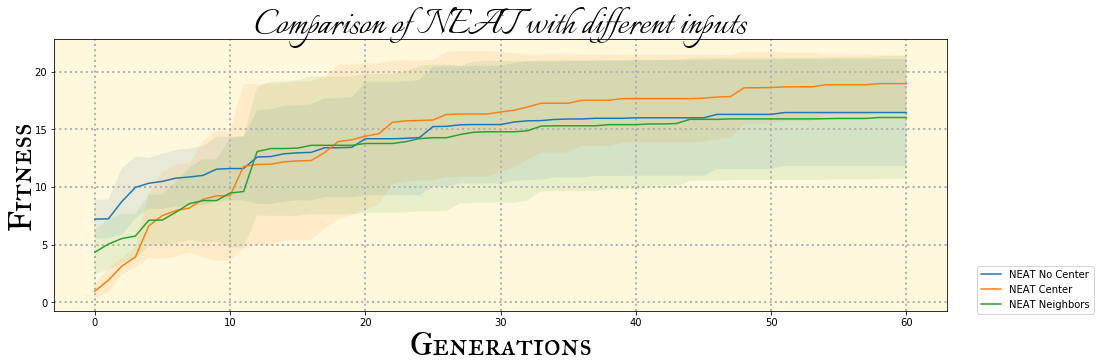

In [4]:
# Plot fitness progress:
ax, fig = plt.subplots(figsize=(16,5))
fig.set_facecolor('cornsilk')
fig.grid(linestyle='--', linewidth=0.1)

fig.plot(neat_no_center_mean, label="NEAT No Center")
fig.fill_between(range(61), neat_no_center_mean - neat_no_center_std, neat_no_center_mean + neat_no_center_std, alpha=0.1)

fig.plot(neat_center_mean, label="NEAT Center")
fig.fill_between(range(61), neat_center_mean - neat_center_std, neat_center_mean + neat_center_std, alpha=0.1)

fig.plot(neat_neighbors_mean, label="NEAT Neighbors")
fig.fill_between(range(61), neat_neighbors_mean - neat_neighbors_std, neat_neighbors_mean + neat_neighbors_std, alpha=0.1)


fig.legend(loc='lower right', bbox_to_anchor=(1.17, -0.03))
fig.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations', fontproperties=font.prop)
plt.ylabel('Fitness', fontproperties=font.prop)


plt.title('Comparison of NEAT with different inputs', fontproperties=cursive.prop)

Text(0.5,1,'Comparison of NEAT and WANN with center and neighbors type input')

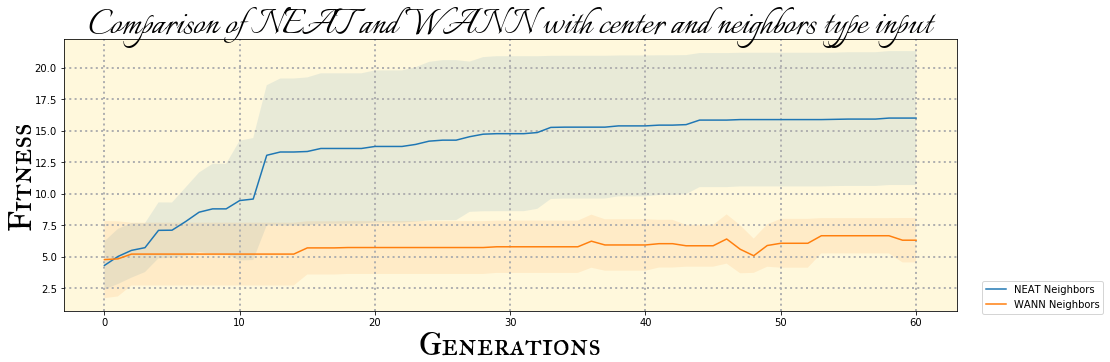

In [5]:
# Plot fitness progress:
ax, fig = plt.subplots(figsize=(16,5))
fig.set_facecolor('cornsilk')
fig.grid(linestyle='--', linewidth=0.1)

fig.plot(neat_neighbors_mean, label="NEAT Neighbors")
fig.fill_between(range(61), neat_neighbors_mean - neat_neighbors_std, neat_neighbors_mean + neat_neighbors_std, alpha=0.1)

fig.plot(wann_neighbors_mean, label="WANN Neighbors")
fig.fill_between(range(61), wann_neighbors_mean - wann_neighbors_std, wann_neighbors_mean + wann_neighbors_std, alpha=0.1)

fig.legend(loc='lower right', bbox_to_anchor=(1.17, -0.03))
fig.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations', fontproperties=font.prop)
plt.ylabel('Fitness', fontproperties=font.prop)


plt.title('Comparison of NEAT and WANN with center and neighbors type input', fontproperties=cursive.prop)